In [2]:
# Initialize Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#ignore warnings
warnings.filterwarnings('ignore') 

## Read csv file

In [4]:
#read the csv file and load data to dataframe
loan_df = pd.read_csv("loan.csv")
loan_df.shape

(39717, 111)

In [5]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
#get the loan status coumn values
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [13]:
# dropping the rows with value as 'Current' in loan_status column as it is not required to be considered in our data preparation

loan_df = loan_df[loan_df['loan_status']!='current'] 

In [16]:
#Check all teh columns with null values

columns_na = list(loan_df.columns[loan_df.isna().all()])

columns_na

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [17]:
# drop columns which has all the values as null

loan_df = loan_df.dropna(axis=1,how='all')

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [19]:
#Check again for the columns with all the values as null values

columns_na = list(loan_df.columns[loan_df.isna().all()])

columns_na

[]

In [20]:
# Delete the columns which contains text and descriptions

loan_df.drop(columns=['desc','title'],inplace=True)
loan_df.shape

(39717, 55)

In [21]:
# Identify all the columns which are unique in nature i.e it contains id'or url'

unique_col = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]

unique_col

['id', 'member_id', 'url']

In [22]:
# Delete all the columns which are unique in nature i.e it contains id'or url'

loan_df.drop(['id','member_id','url'],axis=1,inplace=True)


In [23]:
#check the shape of df
loan_df.shape

(39717, 52)

In [ ]:
#check the columns with unique values
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
pymnt_plan                        1
collections_12_mths_ex_med        1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [26]:
# Drop columns which is having single values in all the rows
loan_df.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','initial_list_status','pymnt_plan','collections_12_mths_ex_med'],axis=1,inplace=True)

In [27]:
#check the shape of df
loan_df.shape

(39717, 43)

In [35]:
# dropping columns which has more than 50% of the values has null values

total_rows = len(loan_df)
for col in loan_df.columns:
    if loan_df[col].isna().mean().round(2) >=0.50:
        print(col)
        loan_df.drop(col,axis=1,inplace=True)

mths_since_last_delinq
mths_since_last_record
next_pymnt_d


In [36]:
loan_df.shape

(39717, 40)

In [37]:
# Deleting emp_title column as it will not contribute in data analysis

loan_df.drop('emp_title',axis=1,inplace=True)

## Data Conversion

In [39]:
loan_df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [40]:
# Convert term column into int type

loan_df.term.value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [ ]:
# clean term column
def termclean(value):
    return int(value.strip().split()[0])

loan_df.term = loan_df.term.apply(termclean)


In [43]:
#post column clean up data type of the column is changed to int
loan_df.term.dtype

dtype('int64')

In [44]:
loan_df.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [46]:
#convert int_rate column to float
loan_df.int_rate.astype(str).replace("%","",regex=True).astype('float')

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [47]:
loan_df.loan_amnt.value_counts()

loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64

In [48]:
#Convert loan_amnt and funded_amnt column to float from int

loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500.0,2500.0,2500.0,60,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400.0,2400.0,2400.0,36,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000.0,10000.0,10000.0,36,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000.0,3000.0,3000.0,60,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500.0,2500.0,1075.0,36,8.07%,78.42,A,A4,4 years,MORTGAGE,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,8500.0,8500.0,875.0,36,10.28%,275.38,C,C1,3 years,RENT,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,5000.0,5000.0,1325.0,36,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,5000.0,5000.0,650.0,36,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [50]:
# converting issue_d to yyyy -mm-dd format
loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format='%b-%y')
loan_df.issue_d.value_counts()

issue_d
2011-12-01    2260
2011-11-01    2223
2011-10-01    2114
2011-09-01    2063
2011-08-01    1928
2011-07-01    1870
2011-06-01    1827
2011-05-01    1689
2011-04-01    1562
2011-03-01    1443
2011-01-01    1380
2011-02-01    1297
2010-12-01    1267
2010-10-01    1132
2010-11-01    1121
2010-07-01    1119
2010-09-01    1086
2010-08-01    1078
2010-06-01    1029
2010-05-01     920
2010-04-01     827
2010-03-01     737
2010-02-01     627
2009-11-01     602
2009-12-01     598
2010-01-01     589
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007

In [51]:
# Checking null rows

(loan_df.isnull().sum()*100)/len(loan_df)

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0

In [53]:
# Removing null rows from emp_length and pub_rec_bankruptcies

loan_df = loan_df[loan_df.emp_length.notna()]

loan_df = loan_df[loan_df.pub_rec_bankruptcies.notna()]

In [54]:
loan_df.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39562       1 year
39573      3 years
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 37945, dtype: object

In [55]:
# clean emp_lenght column

def strip_emp_length(x):
    x = x.strip("years")
    x=x.strip("<")
    x=x.replace(" ","")
    x = x.replace("+","")
    return x
loan_df.emp_length = loan_df.emp_length.apply(lambda x : strip_emp_length(x))

In [56]:
loan_df.emp_length.value_counts()

emp_length
10    8760
1     7564
2     4304
3     4034
4     3391
5     3249
6     2197
7     1751
8     1454
9     1241
Name: count, dtype: int64

# Derived Columns

In [57]:
loan_df["issue_year"] = pd.DatetimeIndex(loan_df.issue_d).year
loan_df["issue_month"] = pd.DatetimeIndex(loan_df.issue_d).month

{'whiskers': [<matplotlib.lines.Line2D at 0x219285ab050>,
 'caps': [<matplotlib.lines.Line2D at 0x219285ab5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x219285aa180>],
 'medians': [<matplotlib.lines.Line2D at 0x219285abbc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x219285abec0>],
 'means': []}

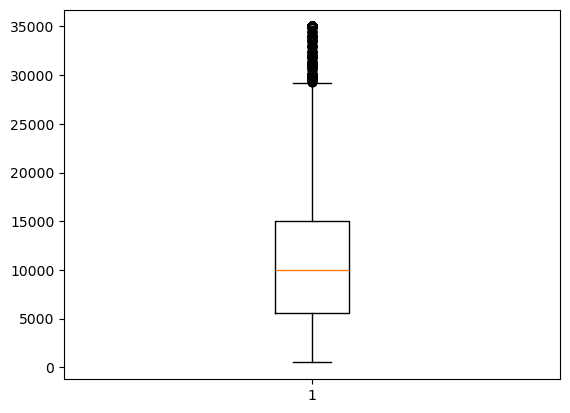

In [58]:
plt.boxplot(loan_df.loan_amnt)

# Univariate Analysis

In [84]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [59]:
# Bucketing Loan Amount values for better understading

def bucket_loan_amt(value):
    if value <= 5000:
        return '0-5k'
    elif (value>5000) and (value<=10000):
        return '5k-10k'
    elif (value>10000) and (value<=15000):
        return '10k-15k'
    else:
        return '15k-above'
    
#creating new column 'loan_bucket_amnt'
loan_df["loan_bucket_amnt"] = loan_df.apply(lambda x: bucket_loan_amt(x['loan_amnt']),axis=1)
    


In [99]:
# bucketing Annual Income

def bucket_annual_income(value):
    if value <= 40000:
        return '0-40k'
    elif (value>40000) and (value<=50000):
        return '40k-50k'
    elif (value>50000) and (value<=60000):
        return '50k-60k'
    elif (value>60000) and (value<=70000):
        return '60k-70k'
    elif (value>70000) and (value<=80000):
        return '70k-80k'
    else:
        return '80k-above'
    

loan_df['annual_bucket_inc'] = loan_df.apply(lambda x: bucket_annual_income(x['annual_inc']),axis=1)


In [129]:
# bucketing Interest rate

def bucket_int_rate(value):
    if value<=9:
        return 'Very Low'
    elif (value>9) and (value<=11):
        return 'Low'
    elif (value>11) and (value<=13):
        return 'Moderate'
    elif (value>13) and (value<=15):
        return 'High'
    else:
        return 'Very High'

loan_df['int_bucket_rate'] = loan_df.apply(lambda x: bucket_int_rate(x.int_rate),axis=1)


In [ ]:

#Convert int_rate data type to float
loan_df.int_rate.value_counts()

loan_df.int_rate = loan_df.int_rate.astype(str).replace("%","",regex = True).astype('float')

In [ ]:
#bucketting dti
def bucket_dti(value):
    if value<=8:
       return 'very low'
    elif (value>8) and (value<=12):
        return 'low'
    elif (value>12) and (value<=16):
        return 'Moderate'
    elif (value>16) and (value<=20):
        return 'high'
    else:
        'very high'

loan_df['dti_bucket'] = loan_df.apply(lambda x: bucket_dti(x.dti),axis=1)

    

<Axes: ylabel='loan_amnt'>

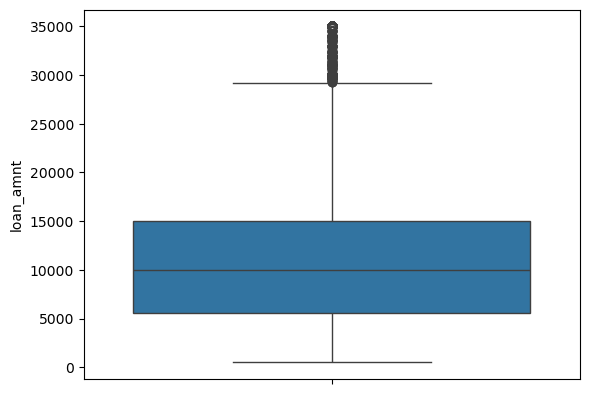

In [71]:
sns.boxplot(loan_df.loan_amnt)

<Axes: ylabel='funded_amnt'>

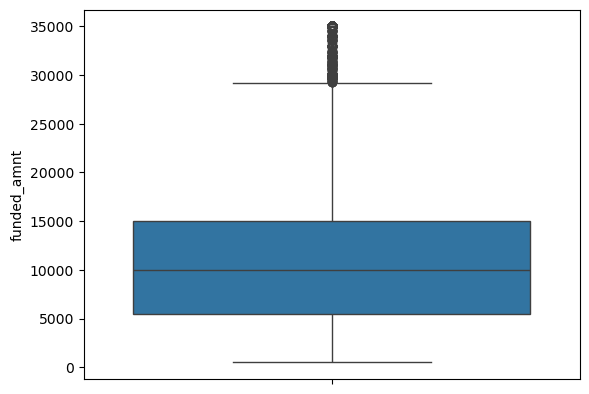

In [72]:
sns.boxplot(loan_df.funded_amnt)

<Axes: ylabel='funded_amnt_inv'>

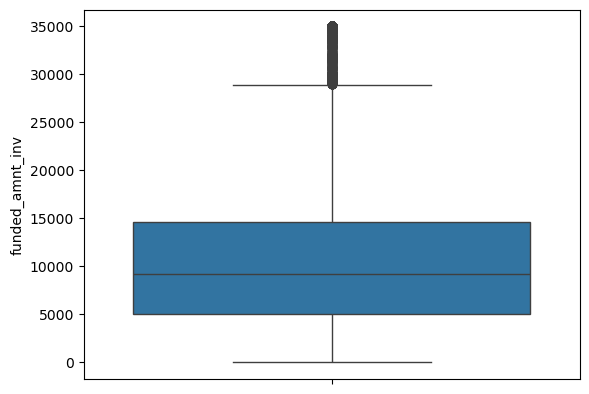

In [73]:
sns.boxplot(loan_df.funded_amnt_inv)

<Axes: ylabel='dti'>

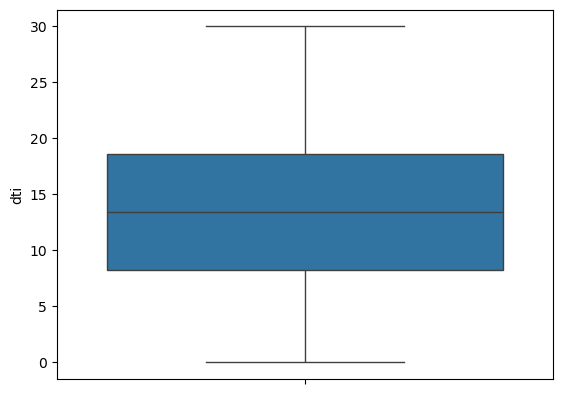

In [74]:
sns.boxplot(loan_df.dti)

In [ ]:
# most of the plots for the amounts attributes contains outliers.

In [75]:
#Remove outliers from columns

outlier_col_set1 = ['loan_amnt','funded_amnt','funded_amnt_inv']
outlier_col_set2 = ['int_rate','installment','annual_inc']

def remove_outlier(data,columns,threshold):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        lower_bound = q1-threshold*iqr
        upper_bound = q3+threshold*iqr
        data = data[(data[col]>=lower_bound) & (data[col] <=upper_bound)]

    return data

loan_df = remove_outlier(loan_df,outlier_col_set1,1.5)
loan_df = remove_outlier(loan_df,outlier_col_set2,1.5)




<Axes: ylabel='loan_amnt'>

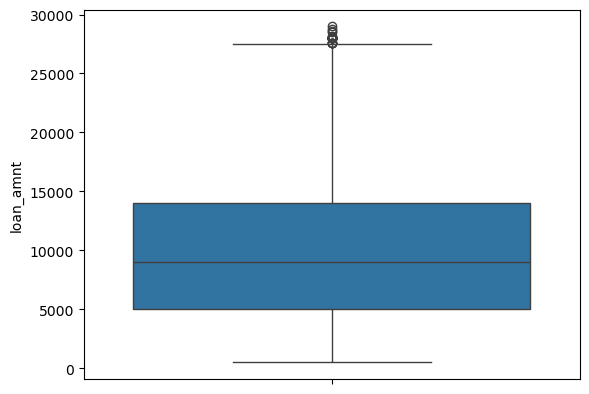

In [76]:
sns.boxplot(loan_df.loan_amnt)

<Axes: ylabel='int_rate'>

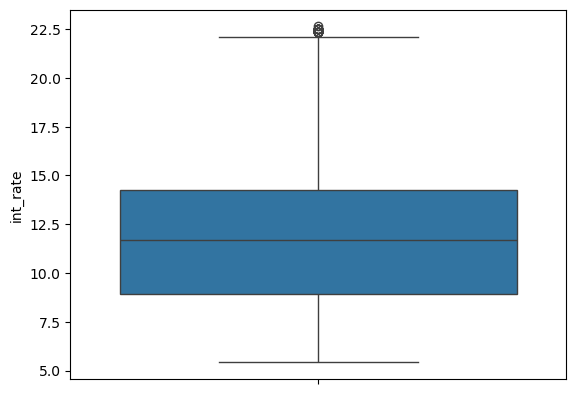

In [77]:
sns.boxplot(loan_df.int_rate)

In [79]:
loan_df.loan_amnt.describe()

count    34134.000000
mean      9962.529296
std       5893.891669
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [82]:
# Plot graph definition

def plot_digram(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

    

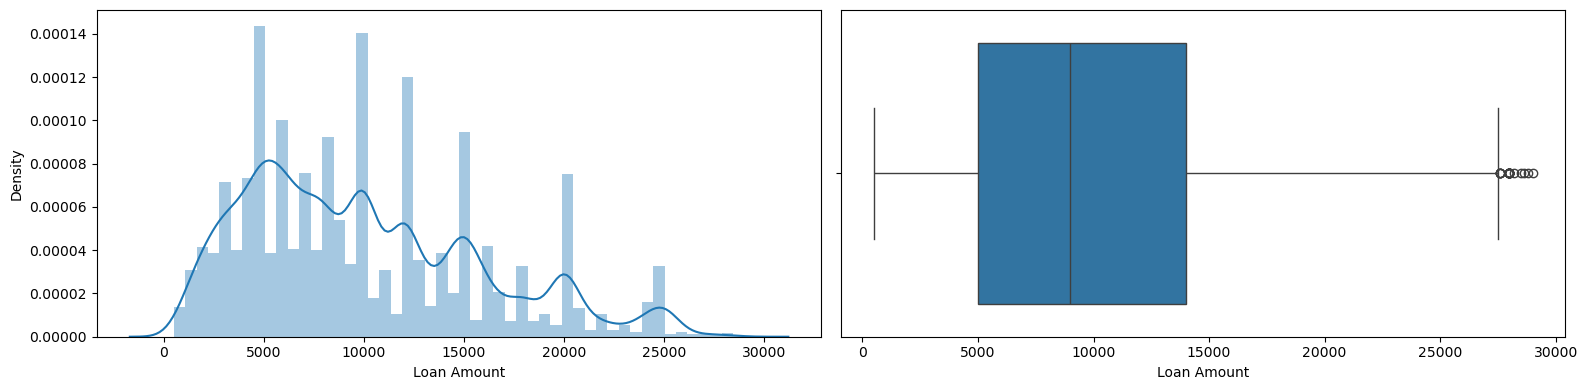

In [85]:
plot_digram(loan_df,'loan_amnt')

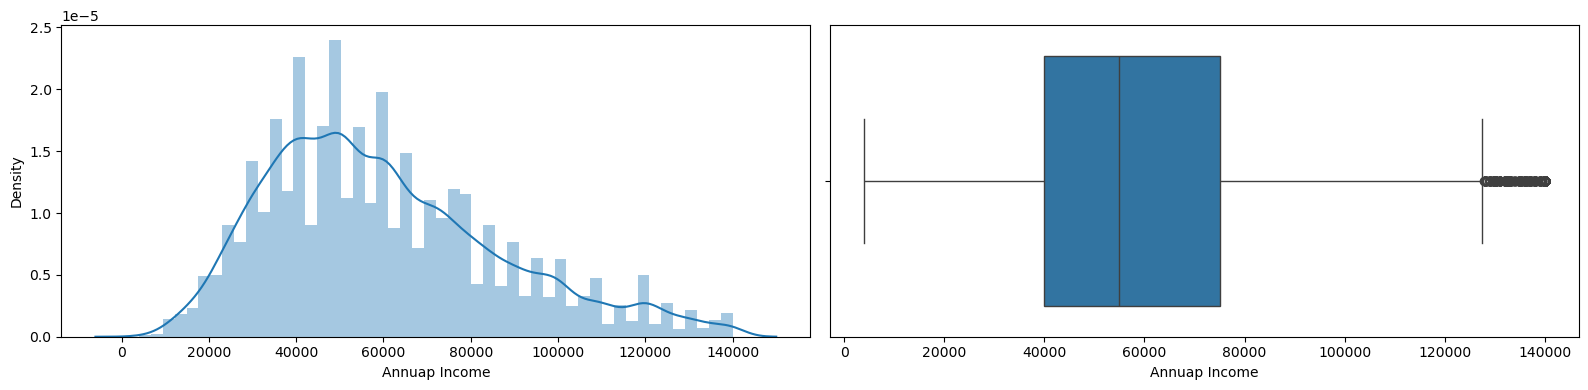

In [86]:
plot_digram(loan_df,'annual_inc')

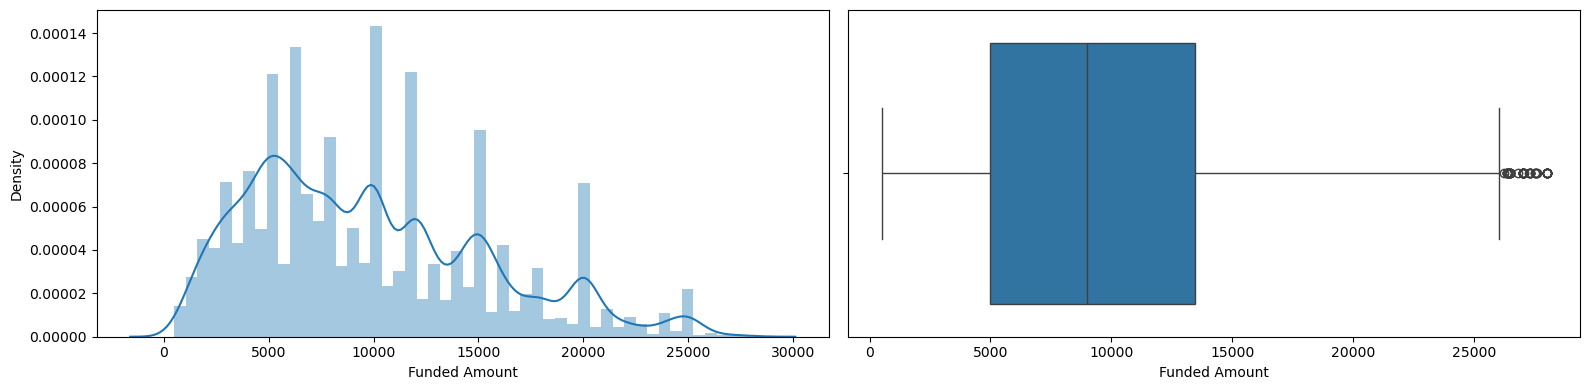

In [87]:
plot_digram(loan_df, 'funded_amnt')

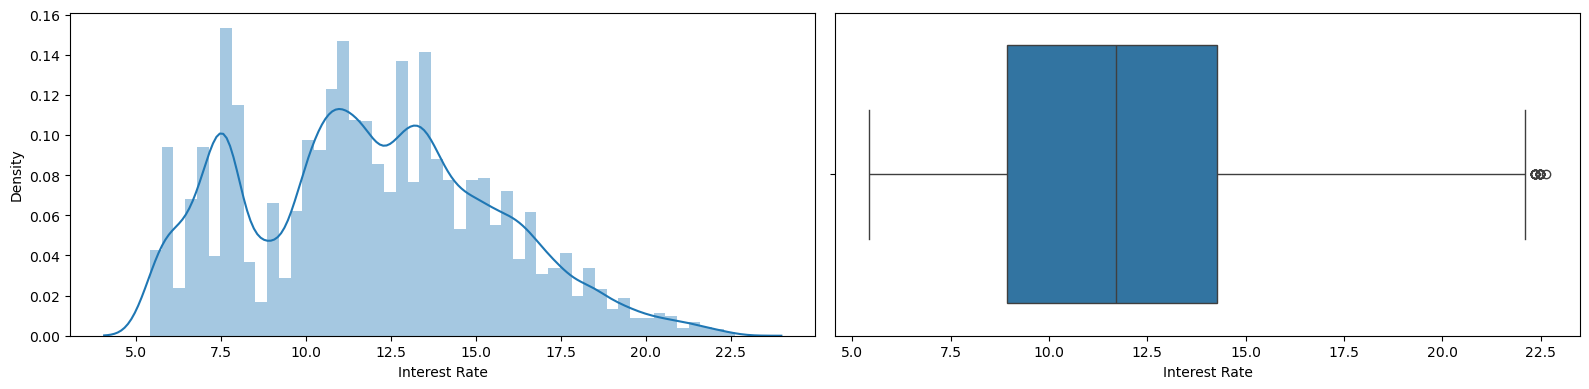

count    34134.000000
mean        11.870825
std          3.628425
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         22.640000
Name: int_rate, dtype: float64

In [89]:
plot_digram(loan_df, 'int_rate')

loan_df.int_rate.describe()

In [ ]:
# Average Rate of interest of rate is 11.9%
# Most of the interest lies between 8% to 14%

<Axes: xlabel='home_ownership'>

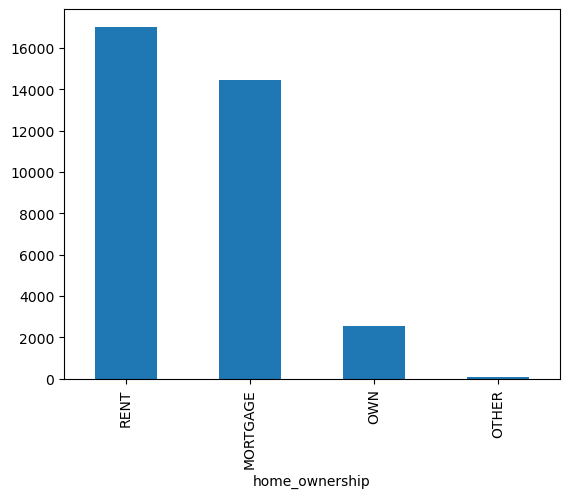

In [90]:
loan_df['home_ownership'].value_counts().plot.bar()

In [ ]:
# Majority of loan applicants are either living on Rent or on Mortgage


In [101]:
# Bivariate Analysis

loan_df['annual_bucket_inc'].value_counts()

annual_bucket_inc
0-40k        9061
80k-above    7031
40k-50k      5570
50k-60k      5380
60k-70k      3855
70k-80k      3237
Name: count, dtype: int64

In [115]:
#Bivariate Analysis on annual income against Chargedoff_Proportion 

inc_range_vs_loan = loan_df.groupby(['annual_bucket_inc','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
print(inc_range_vs_loan)
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status annual_bucket_inc  Charged Off  Current  Fully Paid
0                       0-40k         1573      160        7328
1                     40k-50k          807      166        4597
2                     50k-60k          791      152        4437
3                     60k-70k          489      102        3264
4                     70k-80k          388       90        2759
5                   80k-above          684      221        6126


loan_status,annual_bucket_inc,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-40k,1573,160,7328,8901,0.176722
2,50k-60k,791,152,4437,5228,0.151301
1,40k-50k,807,166,4597,5404,0.149334
3,60k-70k,489,102,3264,3753,0.130296
4,70k-80k,388,90,2759,3147,0.123292
5,80k-above,684,221,6126,6810,0.100441


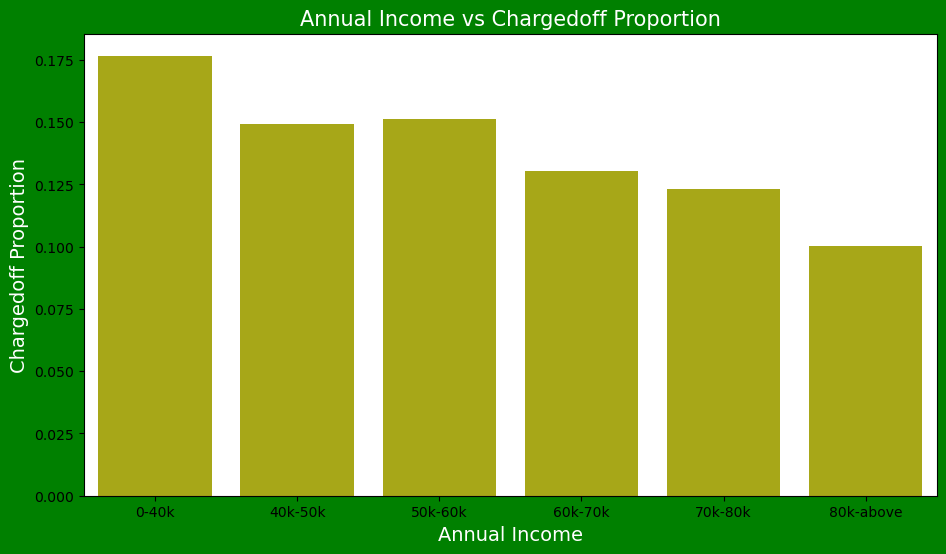

In [120]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(11, 6),facecolor='g')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_bucket_inc', y='Chargedoff_Proportion', data=inc_range_vs_loan, color = 'y')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

In [ ]:
# Observations:
# Income range of 0-40k has more chances of charged off.
# Income range 80k-above has less chances of charged off.
# Anuual income is inversely proportional with the charged off proportion.

In [130]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = loan_df.groupby(['int_bucket_rate', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']

interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']

interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_bucket_rate,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1686,411,4769,6455,0.261193
0,High,986,151,4855,5841,0.168807
2,Moderate,962,187,5643,6605,0.145647
1,Low,579,106,4989,5568,0.103987
4,Very Low,519,36,8255,8774,0.059152


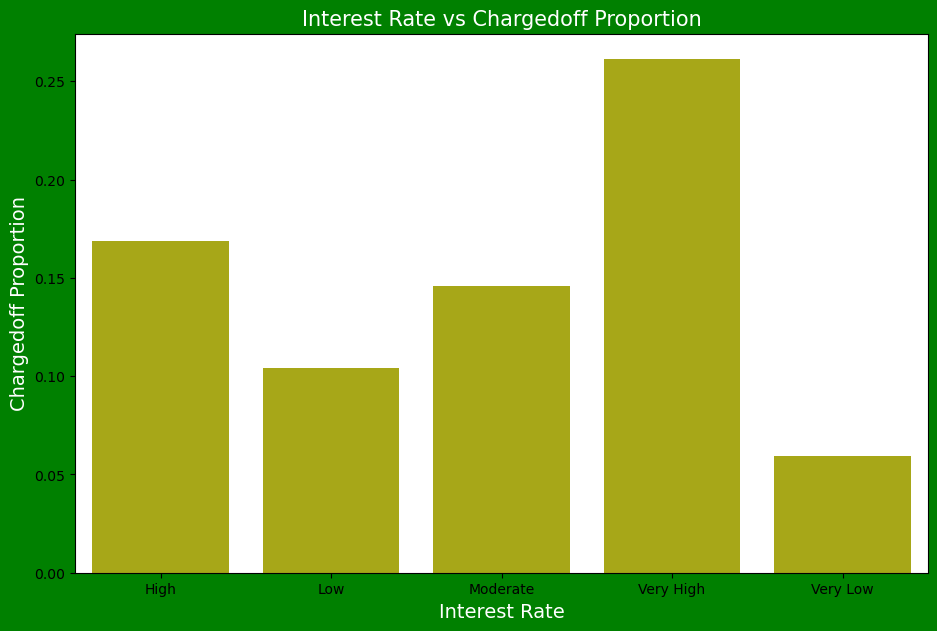

In [131]:
fig, ax1 = plt.subplots(figsize=(11, 7),facecolor='g')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_bucket_rate', y='Chargedoff_Proportion', data=interest_vs_loan,color = 'y')
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [ ]:
#Observation

# Very high interest rate has more chances of being charged off.
# Very low interest rate has less chances of being charged off.

In [132]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16.0,0.0,73.0,89.0,0.179775
3,RENT,2498.0,364.0,14170.0,16668.0,0.149868
2,OWN,357.0,61.0,2123.0,2480.0,0.143952
0,MORTGAGE,1861.0,466.0,12145.0,14006.0,0.132872


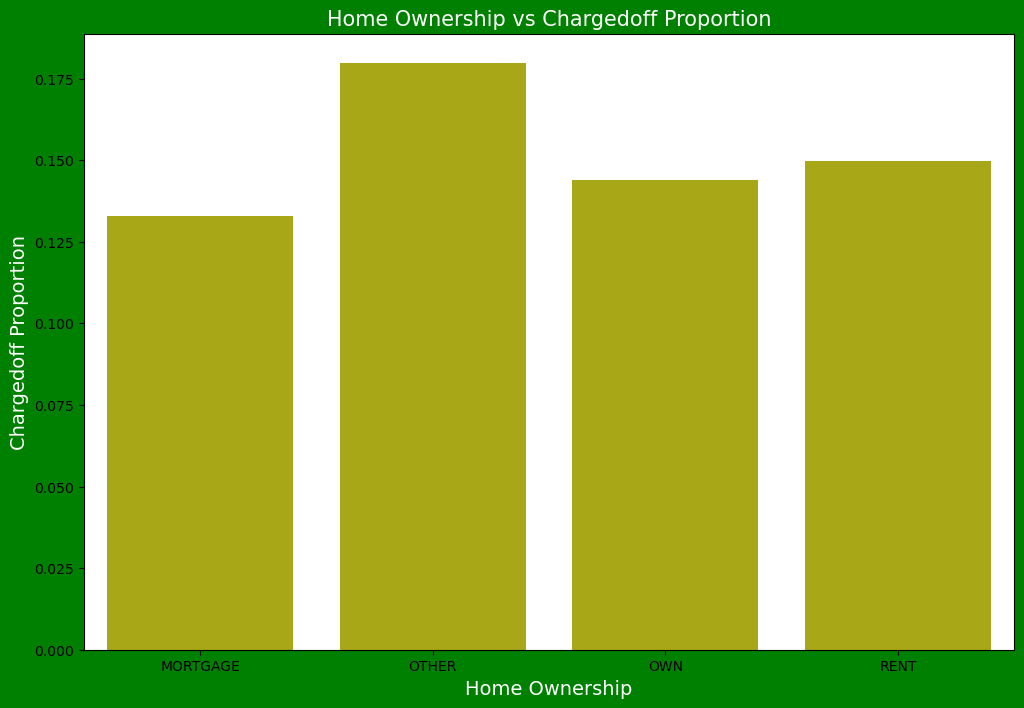

In [134]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan, color = 'y')
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [ ]:
# Observations:
# who owns home has less chances of being charged off.

In [135]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan_df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_month,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
8,9,478.0,115.0,2535.0,3013.0,0.158646
11,12,571.0,171.0,3042.0,3613.0,0.158040
4,5,402.0,68.0,2190.0,2592.0,0.155093
5,6,413.0,86.0,2395.0,2808.0,0.147080
9,10,463.0,125.0,2700.0,3163.0,0.146380
10,11,497.0,113.0,2979.0,3476.0,0.142980
6,7,417.0,103.0,2535.0,2952.0,0.141260
7,8,406.0,106.0,2563.0,2969.0,0.136746
0,1,260.0,0.0,1725.0,1985.0,0.130982
3,4,318.0,3.0,2178.0,2496.0,0.127404


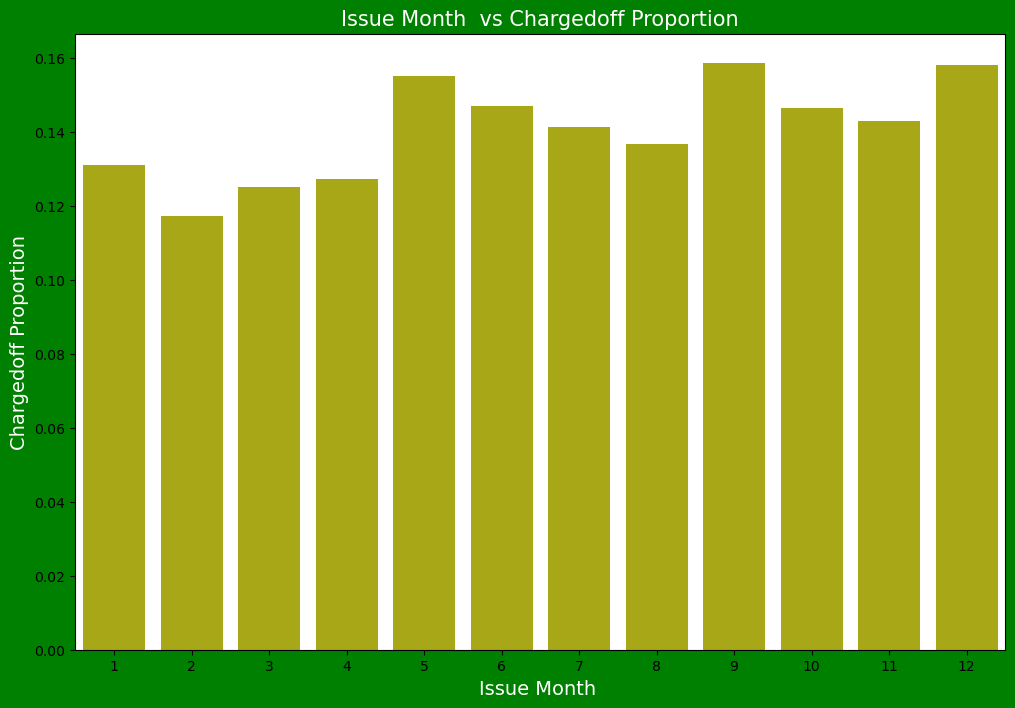

In [138]:
# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan,color = 'y')
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [ ]:
#Majority of loan defaults comig from applicants whose loan has been aprroved from Sept to Dec